In [27]:
import pandas as pd
import numpy as np

df = pd.read_csv('201901-202003.csv')

In [44]:
import matplotlib.pyplot as plt

In [23]:
cols = ['CSTMR_CNT', 'AMT', 'CNT']
data1 = df[cols]

corr = data1.corr(method = 'pearson')
corr

CSTMR_CNT       AMT       CNT
CSTMR_CNT   1.000000  0.866339  0.930356
AMT         0.866339  1.000000  0.778102
CNT         0.930356  0.778102  1.000000

In [33]:
df = df.fillna('')
df = df[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', "AMT"]]
df = df.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop = False)

In [34]:
df

REG_YYMM CARD_SIDO_NM            STD_CLSS_NM          AMT
0       201901           강원             건강보조식품 소매업    148354746
1       201901           강원                골프장 운영업   1229200312
2       201901           강원            과실 및 채소 소매업   1286979106
3       201901           강원      관광 민예품 및 선물용품 소매업     30656770
4       201901           강원        그외 기타 스포츠시설 운영업     13101500
...        ...          ...                    ...          ...
9433    202003           충북  피자 햄버거 샌드위치 및 유사 음식점업   1315245299
9434    202003           충북                한식 음식점업  16152482704
9435    202003           충북                    호텔업     15248550
9436    202003           충북          화장품 및 방향제 소매업    428881434
9437    202003           충북               휴양콘도 운영업     12733490

[9438 rows x 4 columns]

In [15]:
submisstion = pd.read_csv('submission.csv', index_col=0)
submisstion = submisstion.loc[submisstion.REG_YYMM == 202004]

In [30]:
submisstion = submisstion[['CARD_SIDO_NM', 'STD_CLSS_NM']]

REG_YYMMs = np.sort(df['REG_YYMM'].unique())
REG_YYMMs

array([201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908,
       201909, 201910, 201911, 201912, 202001, 202002, 202003],
      dtype=int64)

In [ ]:
m

In [40]:
AMTs = [] 

for REG_YYMM in REG_YYMMs:
    data =df.loc[df['REG_YYMM'] == REG_YYMM]
    data = data[['CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
    tmp = submisstion.merge(data, left_on=['CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['CARD_SIDO_NM', 'STD_CLSS_NM'], how = 'left')
    tmp = tmp.fillna(0)
    AMT = list(tmp['AMT'])
    AMTs.append(AMT)
AMTs = np.array(AMTs)
AMTs

array([[1.48354746e+08, 1.22920031e+09, 1.28697911e+09, ...,
        3.46627180e+07, 7.28722041e+08, 1.98574855e+08],
       [1.46715871e+08, 1.15224097e+09, 1.11626588e+09, ...,
        3.39593490e+07, 6.55288626e+08, 1.65872181e+08],
       [1.09439025e+08, 2.76049714e+09, 9.39227950e+08, ...,
        3.60300100e+07, 7.29328422e+08, 1.07431443e+08],
       ...,
       [1.85008768e+08, 1.24110201e+09, 1.57655655e+09, ...,
        4.13298500e+07, 5.64909717e+08, 2.22073112e+08],
       [7.65055610e+07, 9.68456455e+08, 8.67214360e+08, ...,
        1.15169300e+07, 4.95012925e+08, 4.70858300e+07],
       [9.60590120e+07, 2.91579800e+09, 9.94816943e+08, ...,
        1.52485500e+07, 4.28881434e+08, 1.27334900e+07]])

In [42]:
def plot_graph(dt, AMTs):
    for i in range(dt, len(AMTs)):
        tmp1 = np.log1p(AMTs[i-dt])
        tmp2 = np.log1p(AMTs[i])
        corr = np.corrcoef(tmp1, tmp2)[0][1]
        plt.title('Correlation: %.4f'%(corr))
        plt.scatter(tmp1, tmp2, color='k', alpha=0.1)
        plt.xlabel('Log AMT, %s'%(REG_YYMMs[i-dt]))
        plt.ylabel('Log AMT, %s'%(REG_YYMMs[i]))
        plt.xlim(tmp1.min(), tmp1.max())
        plt.ylim(tmp1.min(), tmp1.max())
        plt.show()

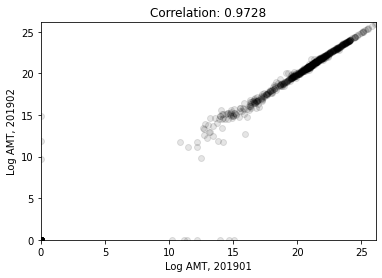

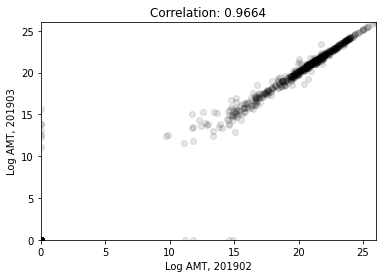

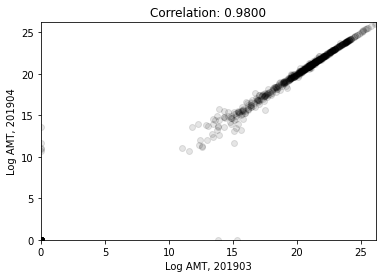

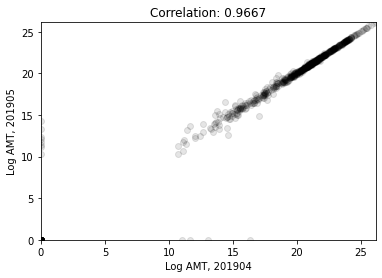

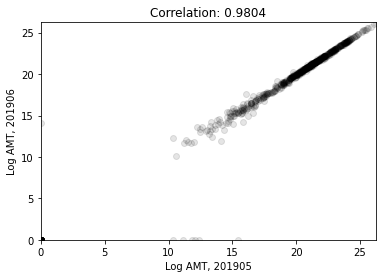

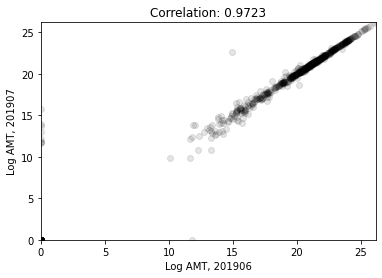

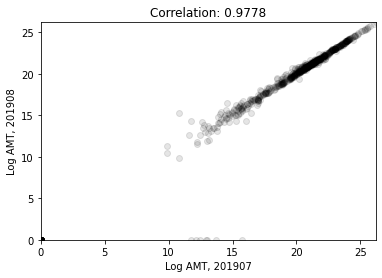

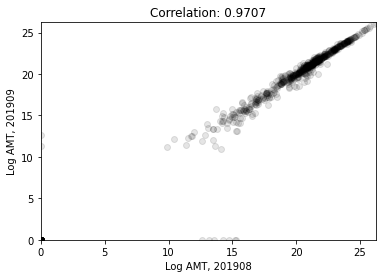

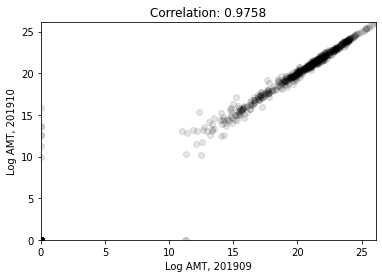

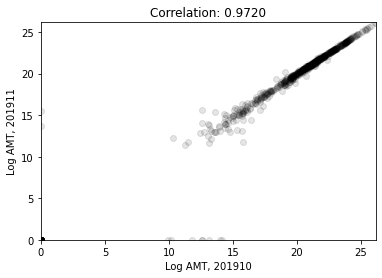

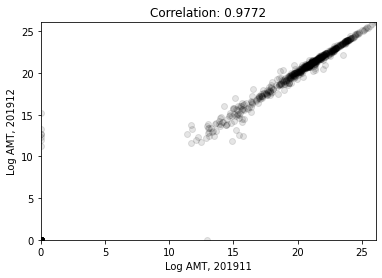

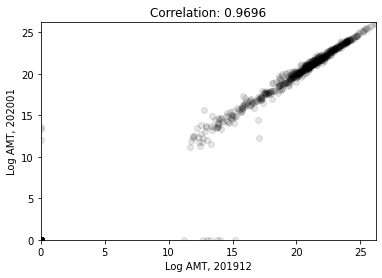

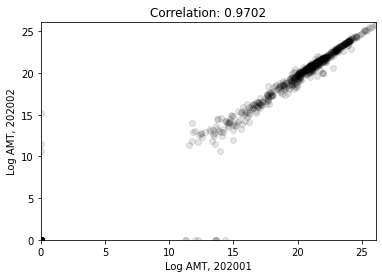

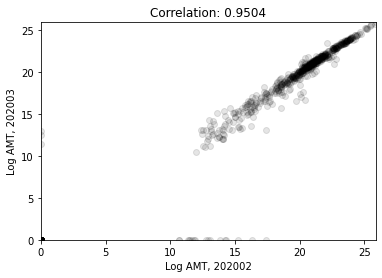

In [45]:
plot_graph(1, AMTs)

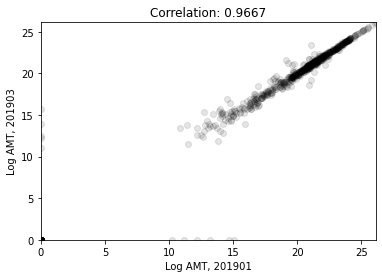

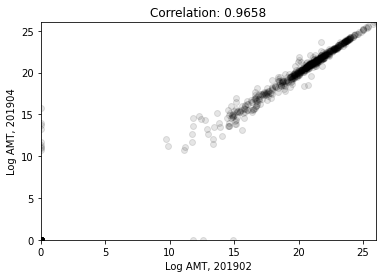

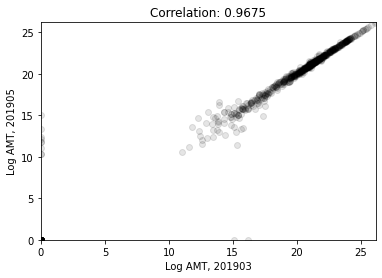

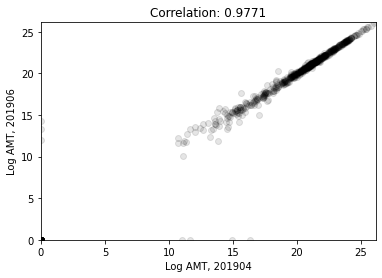

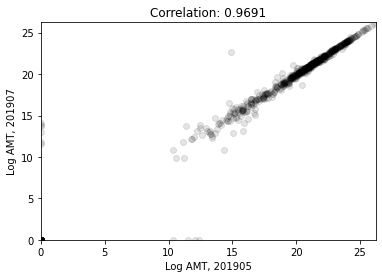

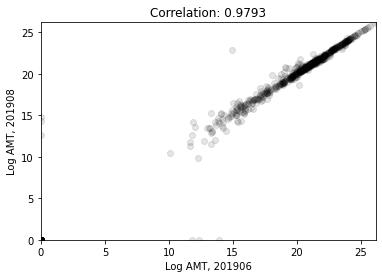

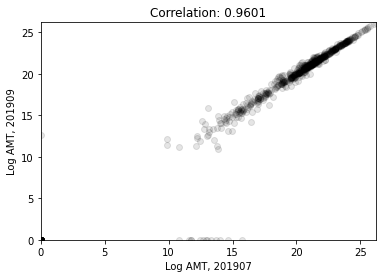

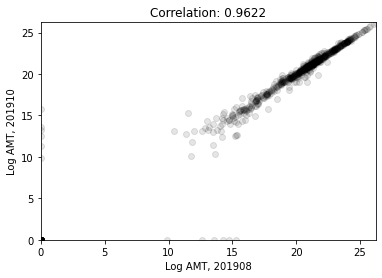

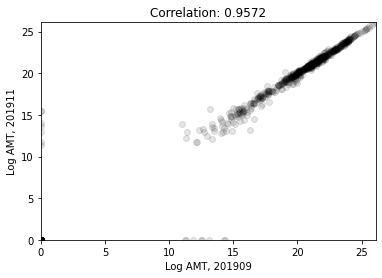

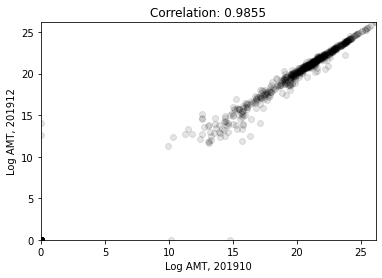

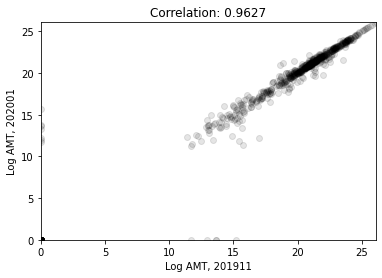

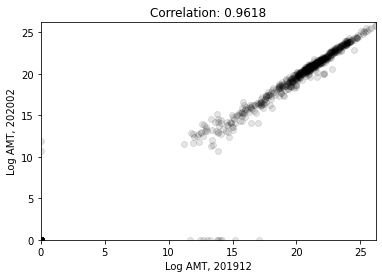

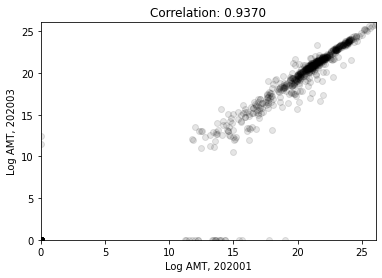

In [49]:
plot_graph(2, AMTs)

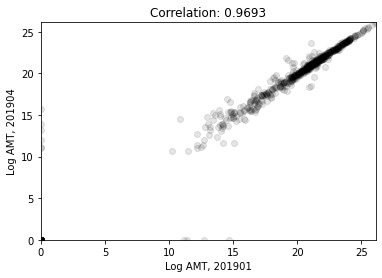

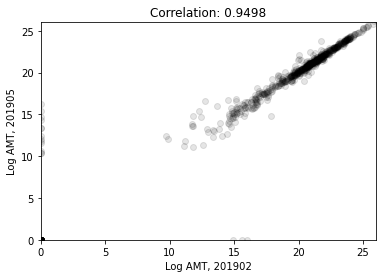

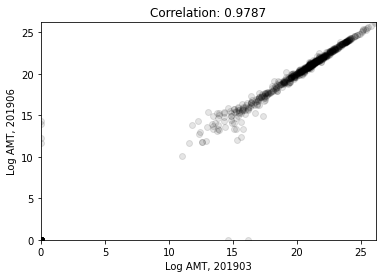

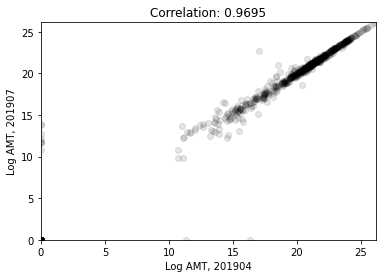

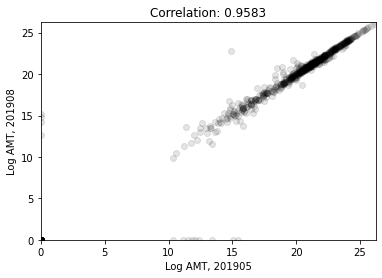

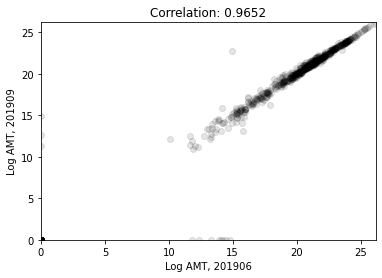

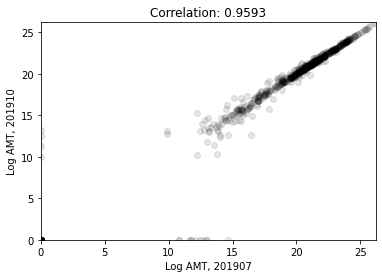

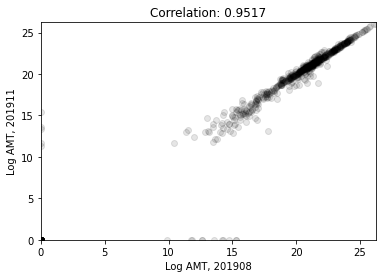

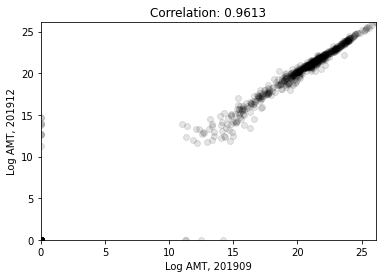

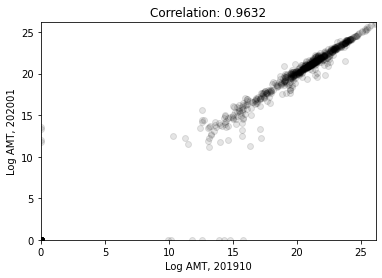

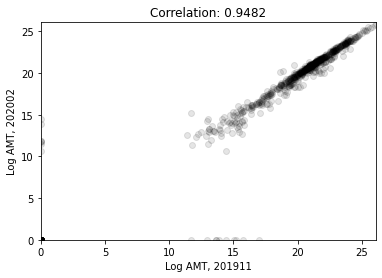

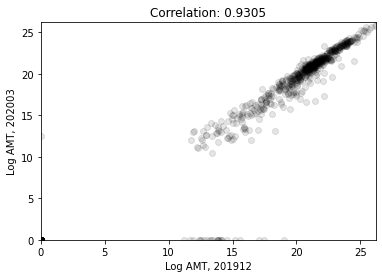

In [46]:
plot_graph(3, AMTs)

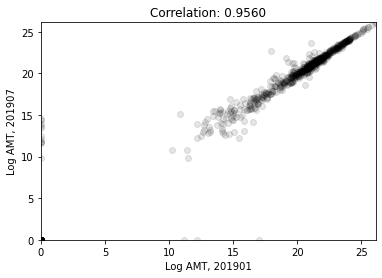

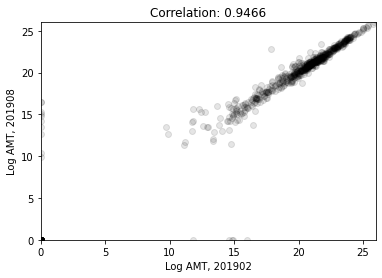

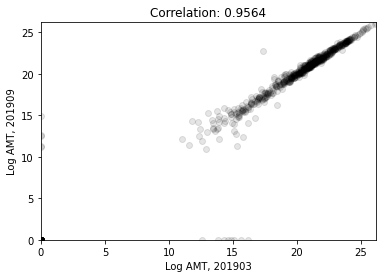

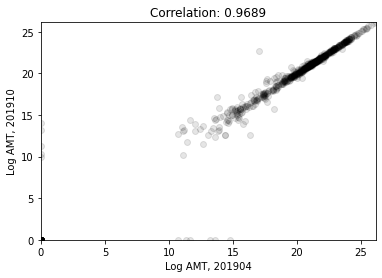

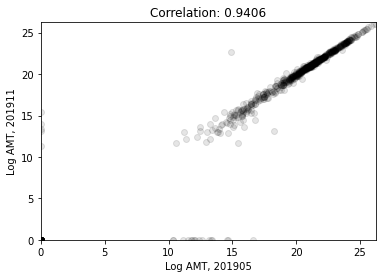

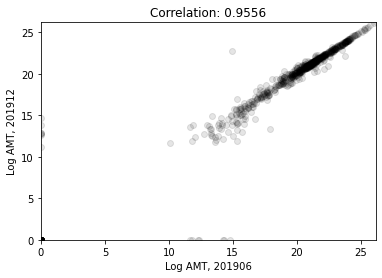

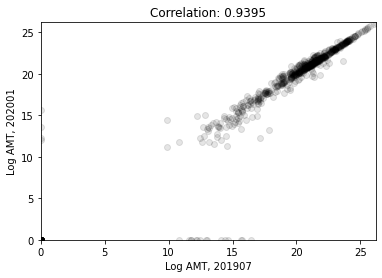

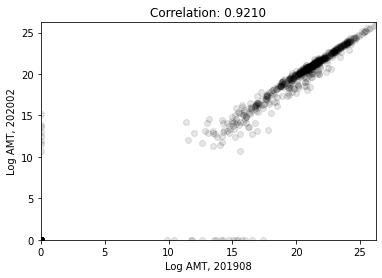

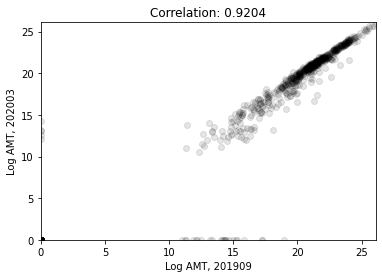

In [47]:
plot_graph(6, AMTs)

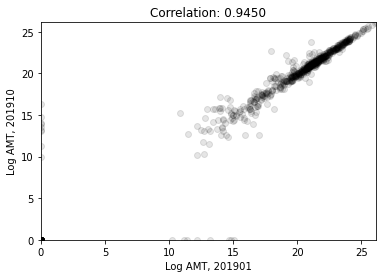

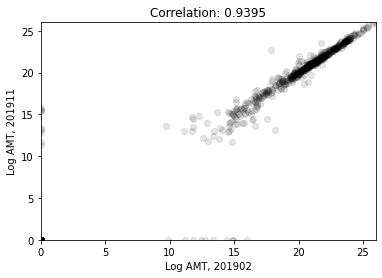

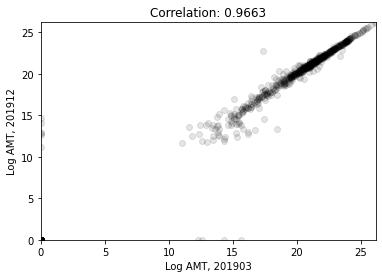

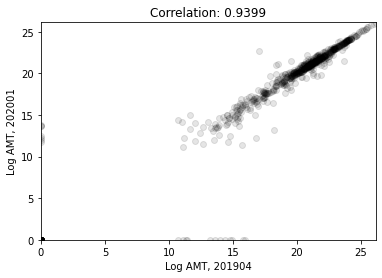

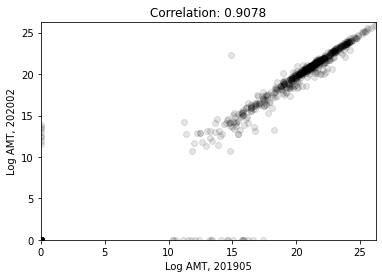

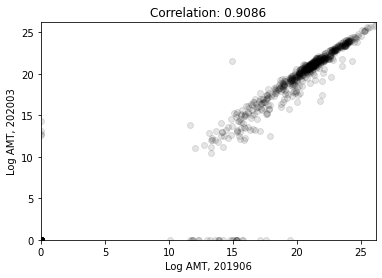

In [50]:
plot_graph(9, AMTs)

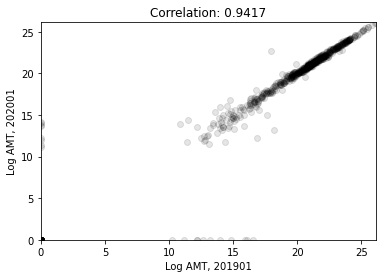

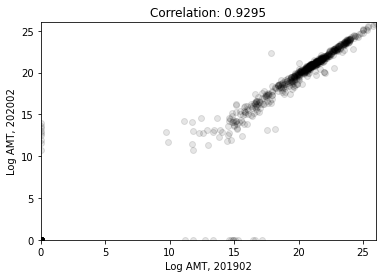

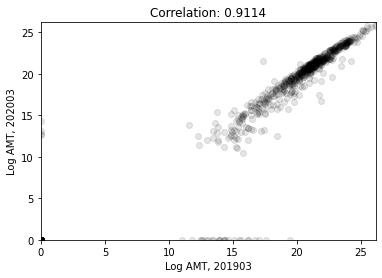

In [48]:
plot_graph(12, AMTs)